Import required libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

User_defined function

In [18]:
def kernel_smoother(x_train, x_test, y_train, y_test=None, kernel='gaussian', bandwidth=0.5):
    y_pred = []
    test_mse = 0.0
    for x in x_test:
       weights = []
       for x_train_i in x_train:
           if kernel == 'gaussian':
               weight = np.exp(-0.5 * ((x - x_train_i) / bandwidth) ** 2)
           elif kernel in ['uniform', 'rectangular']:
               weight = 1.0 if abs(x - x_train_i) <= bandwidth else 0.0
           else:
               raise ValueError("Unsupported kernel type")
           weights.append(weight)
       weights = np.array(weights)
       weighted_sum = np.sum(weights * y_train)
       total_weight = np.sum(weights)
       y_pred.append(weighted_sum / total_weight if total_weight > 0 else 0)
    
    pred = np.array(y_pred)
    if y_test is not None:
        test_mse = mean_squared_error(y_test, pred)
        return pred, test_mse
    return pred

Generate the data

In [3]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

# Set seed for reproducibility
np.random.seed(1234)
# Generate data
X = np.random.uniform(5, 15, 100)
y = reg(X) + np.random.normal(0, 5, 100)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Shape of X_train,X_test is : ",X_train.shape, X_test.shape)
print("Shape of y_train,y_test is : ",y_train.shape,y_test.shape)

Shape of X_train,X_test is :  (80,) (20,)
Shape of y_train,y_test is :  (80,) (20,)


Plot the data 

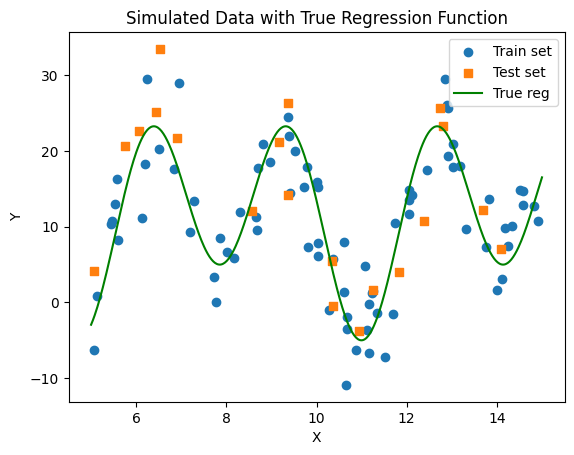

In [4]:
# Plot the training and testing points
plt.scatter(X_train, y_train, marker='o', label='Train set')
plt.scatter(X_test, y_test, marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500)
y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='green', label='True reg')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulated Data with True Regression Function')
plt.legend()
plt.show()

Prediction and Test MSE calculation

In [19]:
pred,test_mse = kernel_smoother(X_train, X_test, y_train, y_test, kernel='gaussian', bandwidth=0.25)
print("Test MSE: ",test_mse)

Test MSE:  22.860216590491508


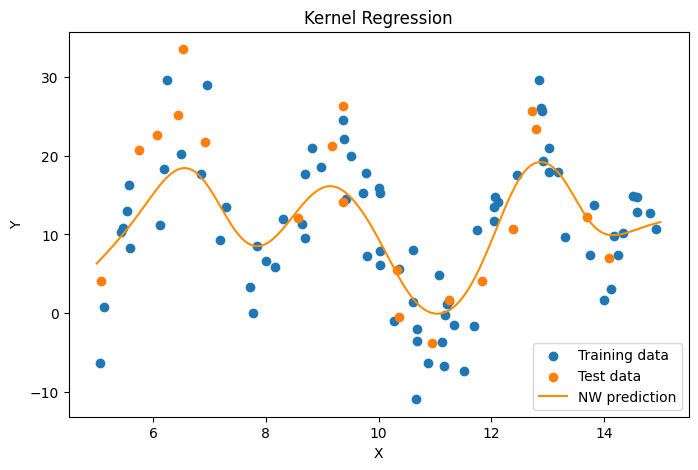

In [ ]:
# Predict for plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

X_plot = np.linspace(5, 15, 1000)
# try the graph with different values of h
y_plot = kernel_smoother(X_train, X_plot, y_train, bandwidth= 0.5)
plt.plot(X_plot, y_plot, color='darkorange', label='NW prediction')
plt.title('Kernel Regression')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Find optimal parameter emperically

In [ ]:
bandwidth = np.arange(0.05,2,0.1) # Number of bins
Res = {h: [] for h in bandwidth}  # Dictionary to store results for each bandwidth
R = 50 # Repeat the procedure 50 times

for r in range(R):
    np.random.seed(r)
    # Simulating different data sets over different replication
    X = np.random.uniform(5, 15, 100)
    Y = reg(X) + np.random.normal(0, 5, 100)    
    # compute the errors for different number of bins
    for h in bandwidth:
        pred_train, mse_train = kernel_smoother(X_train, X_test, y_train, y_test, kernel='gaussian', bandwidth=0.25)
        pred_test, mse_test =
        Res[h].append([train_err, test_err])

# Calculate mean errors for each bandwidth
mean_errors = []
for h in bandwidth:
    mean_train = np.mean([x[0] for x in Res[h]])
    mean_test = np.mean([x[1] for x in Res[h]])
    mean_errors.append([mean_train, mean_test])

# Create the dataframe
Res_df = pd.DataFrame(mean_errors, columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='bandwidth', value=bandwidth)
Res_df